# Introduction to Data Science Exam Notebook
### Student No.: 22009789

This notebook is a data analysis on the UK Gender Pay Gap dataset from 2018/19.

## Load in Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/UK-Gender-Pay-Gap-2018-19.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'Company Num', 'SIC code', 'Organisation', 'Address',
       'Organisation name', 'Male bottom quartile %',
       'Female bottom quartile %', 'Male lower middle quartile %',
       'Female lower middle quartile %', 'Male upper middle quartile %',
       'Female upper middle quartile %', 'Male top quartile %',
       'Female top quartile %', 'Mean wage difference %',
       'Median wage difference %', 'Mean bonus difference %',
       'Median bonus difference %', 'Male bonus %', 'Female bonus %',
       'URL to public gender pay gap information ',
       'Person responsible for GPG reporting', 'Organisation size',
       'Unnamed: 23', 'Late submission', 'Date submitted'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,Company Num,SIC code,Organisation,Address,Organisation name,Male bottom quartile %,Female bottom quartile %,Male lower middle quartile %,Female lower middle quartile %,...,Mean bonus difference %,Median bonus difference %,Male bonus %,Female bonus %,URL to public gender pay gap information,Person responsible for GPG reporting,Organisation size,Unnamed: 23,Late submission,Date submitted
0,0,226143,85310,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...","""Bryanston School"",Incorporated",32.4,67.6,38.2,61.8,...,Not given,Not given,0.0,0.0,https://www.bryanston.co.uk/employment,Michael McGovern (Chief Operating Officer),1000 > num_employees ≥ 500,NaN,False,03/04/2019 13:43
1,1,SC016876,47730,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...","""RED BAND"" CHEMICAL COMPANY, LIMITED",31.6,68.4,12.7,87.3,...,23.7,-75.2,22.2,82.0,NaN,Philip Galt (Managing Director),500 > num_employees ≥ 250,NaN,False,01/04/2019 12:37
2,2,3951948,61900,118 LIMITED,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",118 LIMITED,41.0,59.0,45.0,55.0,...,11.3,10.9,67.0,52.0,NaN,Michael Graham (CEO),5000 > num_employees ≥ 1000,NaN,False,06/03/2019 13:26
3,3,10530651,78300,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",123 EMPLOYEES LTD,0.0,100.0,2.0,98.0,...,-10,69,46.0,74.0,NaN,Chloe Lines (Financial Controller),500 > num_employees ≥ 250,NaN,False,03/04/2019 15:43
4,4,4104101,"85200,\r\n85310",1509 GROUP,"Royal Grammar School, High Street,\r\nGuildfor...",1509 GROUP,38.1,61.9,43.6,56.4,...,0,0,0.0,0.0,https://www.rgs-guildford.co.uk,Kate Perceval (Bursar),500 > num_employees ≥ 250,NaN,False,18/03/2019 14:03


## SECTION 1: Dataset Cleanup

Having looked at the dataset, there is a number of issues that need to be sorted out. There are some columns that are not important for analysis, there are even some repeated columns, so they will need to be removed. 

In [5]:
#Drop unnecessary columns from dataset
df = df.drop(["Unnamed: 0", "Organisation name","Person responsible for GPG reporting",
              "Unnamed: 23","Late submission"], 
             axis = 1)
df.head()

,Company Num,SIC code,Organisation,Address,Male bottom quartile %,Female bottom quartile %,Male lower middle quartile %,Female lower middle quartile %,Male upper middle quartile %,Female upper middle quartile %,...,Female top quartile %,Mean wage difference %,Median wage difference %,Mean bonus difference %,Median bonus difference %,Male bonus %,Female bonus %,URL to public gender pay gap information,Organisation size,Date submitted
0,226143,85310,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nU...",32.4,67.6,38.2,61.8,44.9,55.1,...,46.7,19.6,32.5,Not given,Not given,0.0,0.0,https://www.bryanston.co.uk/employment,1000 > num_employees ≥ 500,03/04/2019 13:43
1,SC016876,47730,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",31.6,68.4,12.7,87.3,11.6,88.4,...,79.7,7.7,-4.2,23.7,-75.2,22.2,82.0,NaN,500 > num_employees ≥ 250,01/04/2019 12:37
2,3951948,61900,118 LIMITED,"Fusion Point,\r\nDumballs Road,\r\nCardiff,\r\...",41.0,59.0,45.0,55.0,50.0,50.0,...,44.0,7.7,12.7,11.3,10.9,67.0,52.0,NaN,5000 > num_employees ≥ 1000,06/03/2019 13:26
3,10530651,78300,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",0.0,100.0,2.0,98.0,17.0,83.0,...,75.0,30.0,29.0,-10,69,46.0,74.0,NaN,500 > num_employees ≥ 250,03/04/2019 15:43
4,4104101,"85200,\r\n85310",1509 GROUP,"Royal Grammar School, High Street,\r\nGuildfor...",38.1,61.9,43.6,56.4,48.4,51.6,...,38.7,13.4,12.7,0,0,0.0,0.0,https://www.rgs-guildford.co.uk,500 > num_employees ≥ 250,18/03/2019 14:03


In [12]:
# The column "URL to public gender pay gap information" is not necessary for analysis but for
# whatever reason, I keep getting an error when trying to remove it. I will just leave the 
# column in the dataset.

#df=df.drop(["URL to public gender pay gap information"], axis = 1)

In [6]:
#Use dropna() to check and remove all rows with empty values 
df = df.dropna()
#df

When removing the rows with NA values, it seemed that the URL to public gender pay gap information column had the greatest effect. Although the information in the column itself is relatively useless, it has helped us keep the data that is easily verifiable (in the sense that, companies who publicly release their gender pay gap data are more likely to have accurate numbers). In all, it could help with the validity of our data analysis.

In [7]:
#Removing any commas found in the SIC column values
#Code adapted from:
#https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells
df = df.replace('\n',' ', regex=True)
df = df.replace('\r',' ', regex=True)
#df

In [8]:
#Will also need to convert the SIC Codes to integers
#Code adapted from https://github.com/pandas-dev/pandas/issues/32818
df['SIC code']=pd.to_numeric(df['SIC code'], errors='coerce')
df = df.dropna() # With this method, some SIC codes were shown to have been entered incorrectly
                 # so they would also need to be removed
df['SIC code'] = df['SIC code'].astype(int)
df['SIC code']

0       85310
5       93110
7       78109
9       56290
11      10120
        ...  
4573    23320
4574    70100
4575    64191
4577    10890
4579    72190
Name: SIC code, Length: 1885, dtype: int32

In [9]:
#Check the how many different organisation sizes there are in the data
df["Organisation size"].unique()

array(['1000 > num_employees ≥ 500', '500 > num_employees ≥ 250',
       '20,000 > num_employees ≥ 5000', '5000 > num_employees ≥ 1000',
       'num_employees < 250', 'num_employees > 20,000'], dtype=object)

Now that we have the different organisation sizes, it is appropriate to create dummy variables out of them. The reason behind this is because looking at the relationship between the number of employees and the wage differences could provide interesting results. 

In [10]:
#Now that we know how big organisations can be, we can convert the ranges into dummy variables

#Get the dummies and store it in a variable
dummy = pd.get_dummies(df["Organisation size"])
 
#Concatenate the dummies to original dataframe
new_df = pd.concat([df, dummy], axis='columns')

#Drop the organisation size column from the new dataframe to avoid any confusion
#merged_df.drop(['Organisation size'], axis=1)

In [106]:
#new_df.dtypes

In [11]:
#Check dataframe
new_df.head()

,Company Num,SIC code,Organisation,Address,Male bottom quartile %,Female bottom quartile %,Male lower middle quartile %,Female lower middle quartile %,Male upper middle quartile %,Female upper middle quartile %,...,Female bonus %,URL to public gender pay gap information,Organisation size,Date submitted,1000 > num_employees ≥ 500,"20,000 > num_employees ≥ 5000",500 > num_employees ≥ 250,5000 > num_employees ≥ 1000,num_employees < 250,"num_employees > 20,000"
0,226143,85310,"""Bryanston School"",Incorporated","Bryanston House, Blandford, Dorset, United ...",32.4,67.6,38.2,61.8,44.9,55.1,...,0.0,https://www.bryanston.co.uk/employment,1000 > num_employees ≥ 500,03/04/2019 13:43,1,0,0,0,0,0
5,6727055,93110,1610 LIMITED,"Hestercombe House, Cheddon Fitzpaine, Taunto...",49.0,51.0,63.0,37.0,32.0,68.0,...,75.0,https://www.1610.org.uk/gender-pay-gap/,500 > num_employees ≥ 250,02/04/2019 15:24,0,0,1,0,0,0
7,7972006,78109,1ST CHOICE STAFF RECRUITMENT LIMITED,"1ST CHOICE RECRUITMENT, 8 St. Loyes Street, ...",66.1,33.9,66.1,33.9,60.0,40.0,...,1.0,https://www.1stchoicerec.net,500 > num_employees ≥ 250,11/02/2019 16:30,0,0,1,0,0,0
9,8929070,56290,1STOP HALAL LIMITED,"Colmore Court, 9 Colmore Row, Birmingham, W...",61.9,38.1,57.7,42.3,75.3,24.7,...,0.0,https://www.shazans.com/gender-pay-gap-analysis/,500 > num_employees ≥ 250,26/03/2019 11:04,0,0,1,0,0,0
11,2826929,10120,2 SISTERS FOOD GROUP LIMITED,"Trinity Park House Trinity Business Park, Fox...",48.3,51.7,56.7,43.3,64.2,35.8,...,0.4,http://www.2sfg.com/how-we-work/gender/,"20,000 > num_employees ≥ 5000",04/04/2019 15:07,0,1,0,0,0,0


Now that the data is relatively clean, we can now start our analysis.

## Data Visualisation

In [12]:
##IMPORT CELL##
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from collections import Counter

Let's pick out some variables to visualise, this way, we can make more sense of the data we are dealing with.

### ORGANISATION SIZE

<AxesSubplot: >

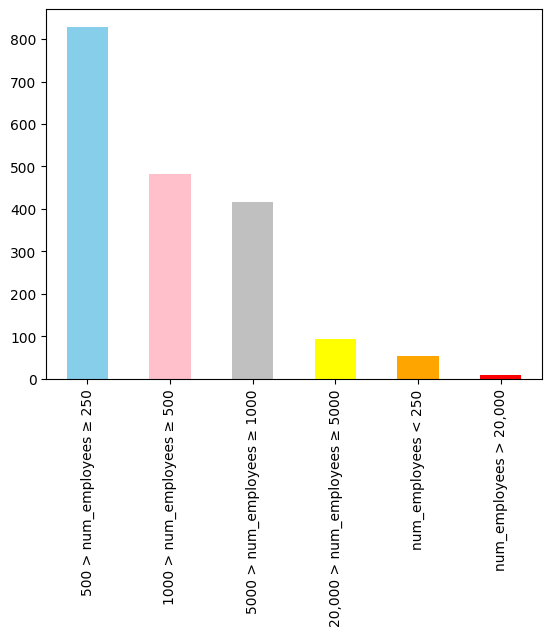

In [13]:
#Plot the organisation size in a bar chart
colours = ['skyblue', 'pink', 'silver','yellow','orange','red']
new_df['Organisation size'].value_counts().plot(kind='bar', color=colours)

<AxesSubplot: ylabel='Organisation size'>

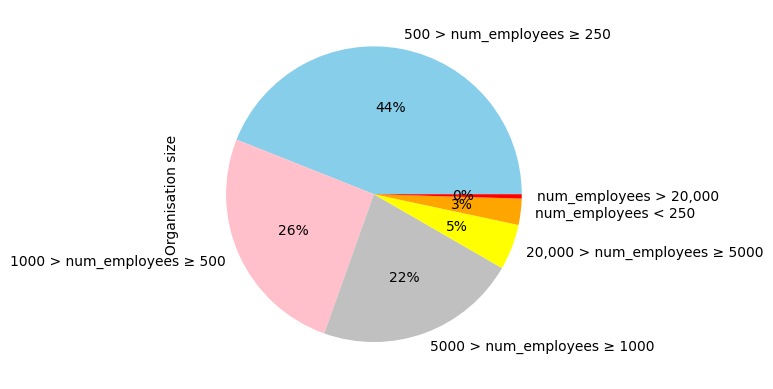

In [14]:
new_df['Organisation size'].value_counts().plot(kind='pie',autopct='%1.0f%%',colors=colours)

From the bar chart and pie chart, the majority of the companies (44%) included in this dataset are not necessarily big but bigger than the average SME (Small and Medium-sized Enterpries). As a matter of fact, only less than 100 of the companies in the dataset (3%) are SMEs; given that, according to [gov.uk](https://www.gov.uk/government/statistics/business-population-estimates-2022/business-population-estimates-for-the-uk-and-regions-2022-statistical-release-html#:~:text=The%20UK%20private%20sector%20comprises,million%20UK%20private%20sector%20businesses), SMEs account for 99.9% of the business population, the dataset is not be very representative. This is also due to the fact that approximately 53% of the dataset consists of companies that employ at least 500 people.

### SIC CODE INFORMATION

In [15]:
#First we need to seperate the SIC codes into their respective groups.
#SIC code classsification list is from https://resources.companieshouse.gov.uk/sic/

all_sic_codes=new_df['SIC code'].to_numpy()
#print(all_sic_codes)

#Set up differnt empty numpy arrays for filtering the SIC code array.

Agriculture=[]     #Agriculture, Forestry and Fishing
Mining=[]          #Mining and Quarrying
Manufacture=[]     #Manufacturing
Energy=[]          #Electricity, gas, steam and AC supply
WaterWaste=[]      #Water supply and waste management
Construction=[]    #Construction
MotorVehicles=[]   #Wholesale, retail and repair of motor vehicles
Transport=[]       #Transportation and Storage
Accom_Food=[]      #Accommodation and Food Service Activities
Info_Comm=[]       #Information and Communication
Finance=[]         #Financial and Insurance Activities
RealEstate=[]      #Real Estate
Science=[]         #Professional, Scientific and Technical Activities
Admin=[]           #Administrative and Support Services
PublicAdmin=[]     #Public Admistration and Defence, Social Security
Education=[]       #Education
Health_Social=[]   #Health and Social Work
Arts_Rec=[]        #Arts, Entertainment and Recreation
Misc=[]            #Other Service Activities
Household=[]       #Activities of Households as Employers
Extraterr=[]       #Activities of Extraterritorial Organisations


In [16]:
# Seperate codes into appropriate arrays
for code in all_sic_codes:
    if 1110 <= code <= 3220:
        Agriculture.append(code)
    elif 5101 <= code <= 9900:
        Mining.append(code)
    elif 10110 <= code <= 33200:
        Manufacture.append(code)
    elif 35110 <= code <= 35300:
        Energy.append(code)
    elif 36000 <= code <= 39000:
        WaterWaste.append(code)
    elif 41100 <= code <= 43999:
        Construction.append(code)
    elif 45111 <= code <= 47990:
        MotorVehicles.append(code)
    elif 49100 <= code <= 53202:
        Transport.append(code)
    elif 55100 <= code <= 56302:
        Accom_Food.append(code)
    elif 58110 <= code <= 63990:
        Info_Comm.append(code)
    elif 64110 <= code <= 66300:
        Finance.append(code)
    elif 68100 <= code <= 68320:
        RealEstate.append(code)
    elif 69101 <= code <= 75000:
        Science.append(code)
    elif 77110 <= code <= 82990:
        Admin.append(code)
    elif 84110 <= code <= 84300:
        PublicAdmin.append(code)
    elif 85100 <= code <= 85600:
        Education.append(code)
    elif 86101 <= code <= 88990:
        Health_Social.append(code)
    elif 90010 <= code <= 93290:
        Arts_Rec.append(code)
    elif 94110 <= code <= 96090:
        Misc.append(code)
    elif 97000 <= code <= 98200:
        Household.append(code)
    elif 99000 <= code <= 99999:
        Extraterr.append(code)

In [48]:
#Get totals of each array to use for visualisation
#len(Extraterr)

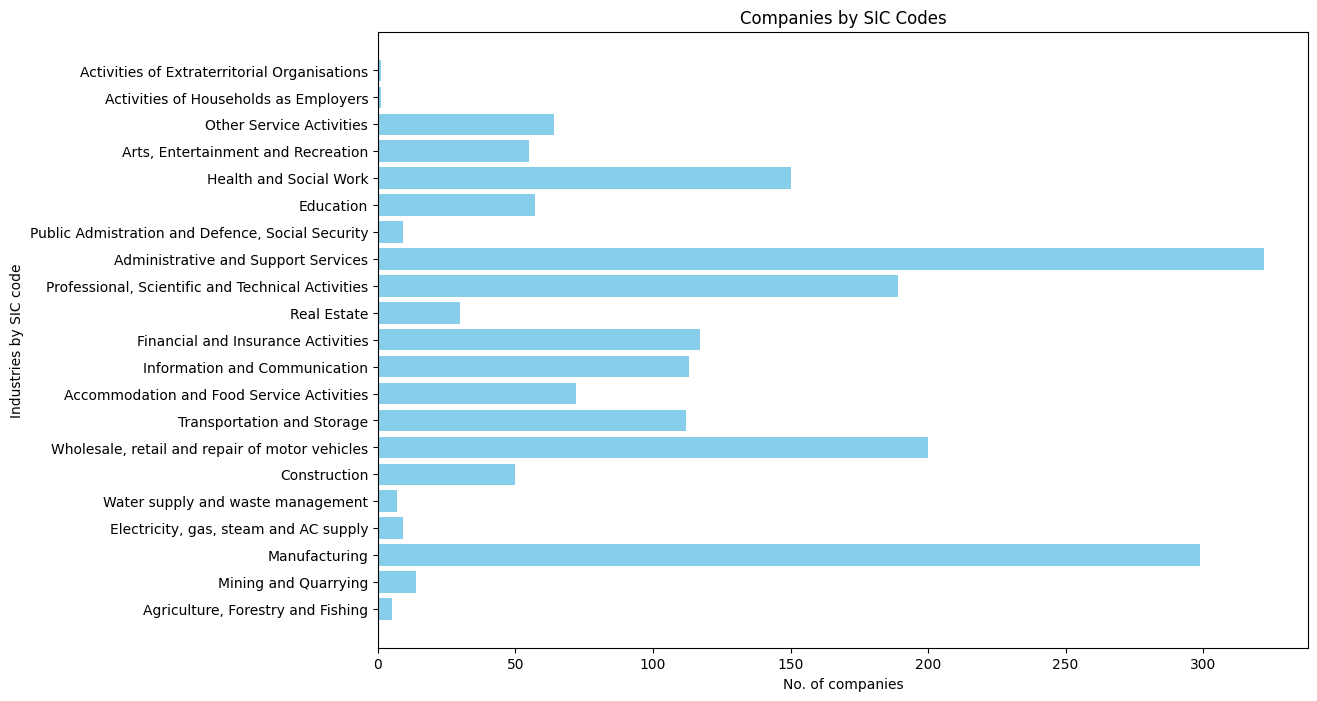

In [17]:
#Code adapted from https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

# creating the dataset
data = {'Agriculture, Forestry and Fishing':5, 'Mining and Quarrying':14, 
        'Manufacturing':299,'Electricity, gas, steam and AC supply':9,
        'Water supply and waste management':7,'Construction':50,
        'Wholesale, retail and repair of motor vehicles':200,
        'Transportation and Storage':112, 
        'Accommodation and Food Service Activities':72,
        'Information and Communication':113, 'Financial and Insurance Activities':117,
        'Real Estate':30, 'Professional, Scientific and Technical Activities':189,
        'Administrative and Support Services':322,
        'Public Admistration and Defence, Social Security':9, 'Education':57,
        'Health and Social Work':150, 'Arts, Entertainment and Recreation':55,
        'Other Service Activities':64, 'Activities of Households as Employers':1,
        'Activities of Extraterritorial Organisations':1}
industries = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (12, 8))
 
# creating the bar plot
plt.barh(industries, values, color ='skyblue')
 
plt.ylabel("Industries by SIC code")
plt.xlabel("No. of companies")
plt.title("Companies by SIC Codes")
plt.show()

The bar chart shows that the biggest sector represented in the data is the administrative and support services sector, with 322 companies. The other sectors that have a large presence in the dataset are manufacturing (299), wholesale and repair of motor vehicles (200), and professional, scientific and technical activities (189).

### WAGE BONUS % (MALE AND FEMALE CORRELATION)

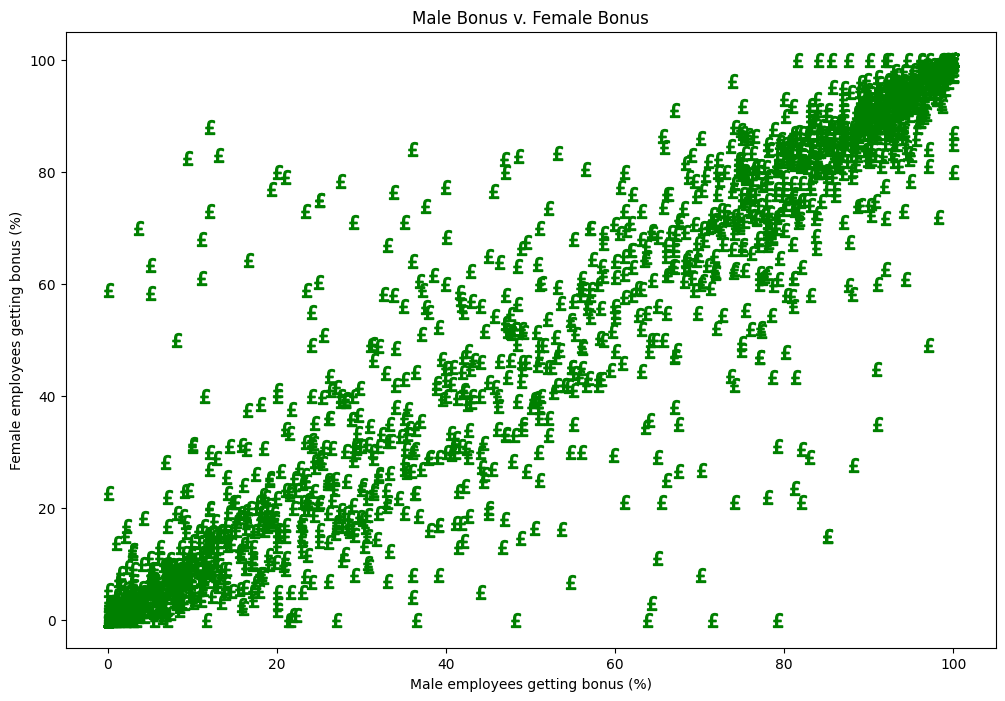

The correlation coefficient is 0.94


In [18]:
#Seperate Male and Female Wage Bonus into seperate arrays
male_bonus=new_df['Male bonus %'].to_numpy()
female_bonus=new_df['Female bonus %'].to_numpy()

#Plot Correlation Scatterplot
fig = plt.figure(figsize = (12, 8))
plt.scatter(male_bonus,female_bonus, color = 'green', marker='$£$',s=100)
plt.xlabel("Male employees getting bonus (%)")
plt.ylabel("Female employees getting bonus (%)")
plt.title("Male Bonus v. Female Bonus")
plt.show()


pearsons_coeff, p = stats.pearsonr(male_bonus, female_bonus)
print("The correlation coefficient is",round(pearsons_coeff,2))

In our scatterplot, there is a strong positive correlation between the porportion of male employees getting wage bonuses and the proportion of female employees getting wage bonuses; in addition, the Pearsons coefficient is approximately 0.94, which confirms the strong positive correlation. This means that, as more male employees receive a bonus, so do more female employees. Although this doesn't indicate that both bonuses are the same rate, but it still shows that the amount of women receiving bonuses increase as that of their male counterparts.

### MEAN WAGE DIFFERENCE

The average of the mean wage difference is 14.73 %


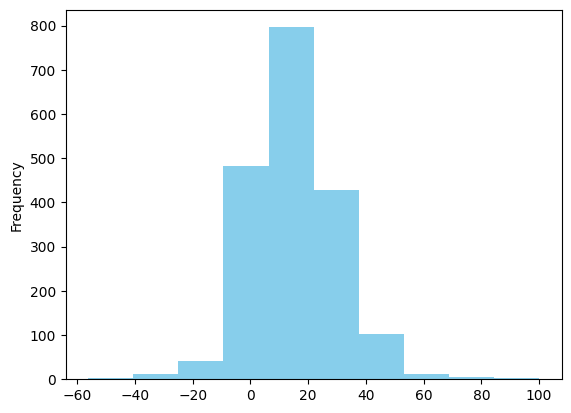

In [19]:
#Use histogram to visualise mean distribution
new_df['Mean wage difference %'].plot(kind='hist', color='skyblue')

mean_of_means=new_df["Mean wage difference %"].mean()
print("The average of the mean wage difference is", round(mean_of_means,2),"%")

The histogram shows that there is no significant skewness to the mean wage difference but rather the data is more central. This does not confirm, however, that the mean wage difference has a normal distribution. An interesting thing to see is that there are some bins that go below zero, which may indicate that there may be a few companies where female employees earn more than male employees (on average). On average, we can say that male wages would exceed female wages by 14.73%.

## Data Modelling (Predictive)

There are many factors and variables that could affect the degree in which male and female wages may differ. For example, level of education, types of roles, the levels of work experience and the company's sector can all affect gender pay equality. To illustrate this, we can construct a regression model that can be used to not only explain the variations in the mean wage difference but can also predict if a company may end up having wage gaps.

In my model, the dependent variable will be the mean wage difference (%). My independent/ explanatory variables will involve the company's sector, the company's size, the proportion of men and women getting bonuses and the porportion of men and women in the company's lowest, top and middle wage quartiles.

What we need to do first is find a way to turn the SIC codes into dummy variables according to their sectors.

In [20]:
#Create a new dataframe for modelling
df4model = new_df

In [21]:
#Use conditions to create the Sector by SIC column
#Code adapted from:
#https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

conditions = [
    (df4model['SIC code']>= 1110) & (df4model['SIC code'] <= 3220),
    (df4model['SIC code']>= 5101) & (df4model['SIC code'] <= 9900),
    (df4model['SIC code']>= 10110) & (df4model['SIC code'] <= 33200),
    (df4model['SIC code']>= 35110) & (df4model['SIC code']<= 35300),
    (df4model['SIC code']>=36000) & (df4model['SIC code'] <= 39000),
    (df4model['SIC code']>= 41100) & (df4model['SIC code'] <= 43999),
    (df4model['SIC code']>= 45111) & (df4model['SIC code'] <= 47990),
    (df4model['SIC code']>= 49100) & (df4model['SIC code'] <= 53202),
    (df4model['SIC code']>= 55100) & (df4model['SIC code'] <= 56302),
    (df4model['SIC code']>= 58110) & (df4model['SIC code'] <= 63990),
    (df4model['SIC code']>= 64110) & (df4model['SIC code'] <= 66300),
    (df4model['SIC code']>=68100) & (df4model['SIC code'] <= 68320),
    (df4model['SIC code']>=69101) & (df4model['SIC code'] <= 75000),
    (df4model['SIC code']>=77110) &(df4model['SIC code'] <= 82990),
    (df4model['SIC code']>=84110) & (df4model['SIC code'] <= 84300),
    (df4model['SIC code']>=85100) & (df4model['SIC code'] <= 85600),
    (df4model['SIC code']>=86101) & (df4model['SIC code'] <= 88990),
    (df4model['SIC code']>=90010) & (df4model['SIC code'] <= 93290),
    (df4model['SIC code']>=94110) & (df4model['SIC code'] <= 96090),
    (df4model['SIC code']>=97000) & (df4model['SIC code'] <= 98200),
    (df4model['SIC code']>=99000) & (df4model['SIC code'] <= 99999)
    ]

#Create a list of the values we want to assign for each condition
values = ['Agriculture', 'Mining', 'Manufacture', 'Energy',
          'WaterWaste','Construction','MotorVehicles','Transport',
          'Accom_Food','Info_Comm','Finance','RealEstate','Science',
          'Admin','PublicAdmin','Education','Health_Social','Arts_Rec',
          'Misc','Household','Extraterr']

#Create a new column and use np.select to assign values to it using our lists as arguments
df4model['Sector_by_SIC'] = np.select(conditions, values)

#Display updated DataFrame
df4model.head()

,Company Num,SIC code,Organisation,Address,Male bottom quartile %,Female bottom quartile %,Male lower middle quartile %,Female lower middle quartile %,Male upper middle quartile %,Female upper middle quartile %,...,URL to public gender pay gap information,Organisation size,Date submitted,1000 > num_employees ≥ 500,"20,000 > num_employees ≥ 5000",500 > num_employees ≥ 250,5000 > num_employees ≥ 1000,num_employees < 250,"num_employees > 20,000",Sector_by_SIC
0,226143,85310,"""Bryanston School"",Incorporated","Bryanston House, Blandford, Dorset, United ...",32.4,67.6,38.2,61.8,44.9,55.1,...,https://www.bryanston.co.uk/employment,1000 > num_employees ≥ 500,03/04/2019 13:43,1,0,0,0,0,0,Education
5,6727055,93110,1610 LIMITED,"Hestercombe House, Cheddon Fitzpaine, Taunto...",49.0,51.0,63.0,37.0,32.0,68.0,...,https://www.1610.org.uk/gender-pay-gap/,500 > num_employees ≥ 250,02/04/2019 15:24,0,0,1,0,0,0,Arts_Rec
7,7972006,78109,1ST CHOICE STAFF RECRUITMENT LIMITED,"1ST CHOICE RECRUITMENT, 8 St. Loyes Street, ...",66.1,33.9,66.1,33.9,60.0,40.0,...,https://www.1stchoicerec.net,500 > num_employees ≥ 250,11/02/2019 16:30,0,0,1,0,0,0,Admin
9,8929070,56290,1STOP HALAL LIMITED,"Colmore Court, 9 Colmore Row, Birmingham, W...",61.9,38.1,57.7,42.3,75.3,24.7,...,https://www.shazans.com/gender-pay-gap-analysis/,500 > num_employees ≥ 250,26/03/2019 11:04,0,0,1,0,0,0,Accom_Food
11,2826929,10120,2 SISTERS FOOD GROUP LIMITED,"Trinity Park House Trinity Business Park, Fox...",48.3,51.7,56.7,43.3,64.2,35.8,...,http://www.2sfg.com/how-we-work/gender/,"20,000 > num_employees ≥ 5000",04/04/2019 15:07,0,1,0,0,0,0,Manufacture


In [22]:
#Create dummy variables from new column

dummy = pd.get_dummies(df4model["Sector_by_SIC"])
df4model = pd.concat([df4model, dummy], axis='columns')

df4model.head()

,Company Num,SIC code,Organisation,Address,Male bottom quartile %,Female bottom quartile %,Male lower middle quartile %,Female lower middle quartile %,Male upper middle quartile %,Female upper middle quartile %,...,Info_Comm,Manufacture,Mining,Misc,MotorVehicles,PublicAdmin,RealEstate,Science,Transport,WaterWaste
0,226143,85310,"""Bryanston School"",Incorporated","Bryanston House, Blandford, Dorset, United ...",32.4,67.6,38.2,61.8,44.9,55.1,...,0,0,0,0,0,0,0,0,0,0
5,6727055,93110,1610 LIMITED,"Hestercombe House, Cheddon Fitzpaine, Taunto...",49.0,51.0,63.0,37.0,32.0,68.0,...,0,0,0,0,0,0,0,0,0,0
7,7972006,78109,1ST CHOICE STAFF RECRUITMENT LIMITED,"1ST CHOICE RECRUITMENT, 8 St. Loyes Street, ...",66.1,33.9,66.1,33.9,60.0,40.0,...,0,0,0,0,0,0,0,0,0,0
9,8929070,56290,1STOP HALAL LIMITED,"Colmore Court, 9 Colmore Row, Birmingham, W...",61.9,38.1,57.7,42.3,75.3,24.7,...,0,0,0,0,0,0,0,0,0,0
11,2826929,10120,2 SISTERS FOOD GROUP LIMITED,"Trinity Park House Trinity Business Park, Fox...",48.3,51.7,56.7,43.3,64.2,35.8,...,0,1,0,0,0,0,0,0,0,0


Now, the data is ready to be modelled.

In [23]:
#df4model.columns

In [24]:
#Seperate the independent and dependent variables from the new dataframe
x = df4model[['Male bonus %', 'Female bonus %','Male bottom quartile %',
               'Female bottom quartile %','Male lower middle quartile %',
               'Female lower middle quartile %','Male upper middle quartile %',
               'Female upper middle quartile %', 'Male top quartile %', 
               'Female top quartile %','1000 > num_employees ≥ 500',
               '20,000 > num_employees ≥ 5000', '500 > num_employees ≥ 250',
               '5000 > num_employees ≥ 1000', 'num_employees < 250',
               'num_employees > 20,000', 'Accom_Food', 'Admin','Agriculture',
               'Arts_Rec', 'Construction', 'Education', 'Energy','Extraterr',
               'Finance', 'Health_Social', 'Household', 'Info_Comm',
               'Manufacture', 'Mining', 'Misc', 'MotorVehicles', 'PublicAdmin',
               'RealEstate', 'Science', 'Transport', 'WaterWaste']]
y = df4model['Mean wage difference %']

#Fit the regression model
regress = linear_model.LinearRegression()
regress.fit(x, y) 
print('The model coefficients are as follows:\n', regress.coef_)  
print('The model intercept is',round(regress.intercept_,3))
print('R-squared = ',round(regress.score(x, y),3))

#Also display the adjusted R-squared
#Code adapted from https://www.statology.org/adjusted-r-squared-in-python/
adjusted_R2= 1 - (1-regress.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('The adjusted R-squared= ', round(adjusted_R2,3))

The model coefficients are as follows:
 [ 0.09275138 -0.0474952  -0.21394801  0.21394801 -0.10879097  0.10879097
 -0.03982073  0.03982073  0.33661801 -0.33661801  0.19189345 -1.35391206
  0.6422926   0.34795997  1.11057684 -0.93881079 -3.51358439 -3.37997151
  2.576144    7.92422043  1.56485915 -1.80794873 -1.97680914 26.28219952
  1.54841395 -2.61596534 -7.1260191   1.97803522 -1.94077787  9.76518277
 -4.99159427 -2.10058926 -2.19600508 -3.13349491 -0.3803744  -3.72187434
 -9.92150295]
The model intercept is 5.644
R-squared =  0.511
The adjusted R-squared=  0.501


### INTERPRETATION OF RESULTS

#### R-squared/ Adjusted R-squared

Firstly, let's look at how well the model actually fits the data. The R-squared we got was 0.511, but since the model is a multiple linear regression, we need to consider the different independent variables against the model. R-squared doesn't do this so it is not a good enough measure of fit - that's why the adjusted R-squared is calculated. Oddly enough, the adjusted R-squared is 0.501. So we can confirm that our model is able to explain 50% of the variation in the data.

It should be noted that, in regards to social science research, an R-/adjusted R-squared of approxiamately 0.5 is considered sufficient. As we are analysing gender pay gaps, our model is sufficient enough.

#### Intercept

The model intercept was 5.644. This tells us that, holding _all_ variables constant, the mean difference between male wages and female wages for an average company, would be 5.644%. That is, an average female employee would earn 94.36p for every £1 the average male employee earns.

#### Coefficients

As there are many variables in our model, we can't really look at all of them individually but we can look at them in categories.

**Wage Bonus Recepients**: For every additional 1% of male employeess that receive a bonus, we can expect the mean wage difference to increase by 0.093%. On the other hand, an extra 1% of female employees that receive a bonus, the mean wage difference actually falls by 0.047%. Although, the degree of change in the wage difference is much higher with the male bonus variable than the female bonus variable (meaning that the percentage of male employees getting bonuses contributes more to the mean wage difference).

**Organisation Size**: Starting with SMEs, if the company is an SME (less than 250 employees) then this increases the mean wage difference by 1.11%. The largest mean wage difference occurs when the company's labour force is in the range of 250-500 (0.642%) - as this employment range is the most common in the dataset, it does make sense that this would be the case. However, it is worth noting that a company with 5000-20000 employees actually has a reverse mean wage difference of 1.354% (i.e, female wages are, on average, higher than male wages). This might be due to the fact that more employees would mean there needs to be a standard wage rate. Another consideration is that larger employers of this size tend to focus on having good ESG (Environment, Social and Governance) scores, and so would actually need to put wage equality policies in place.

**Sector (according to SIC code)**: As stated earlier, the sector can greatly affect the degree of the wage gap and the model shows this quite well. The sectors that have the highest degree of mean wage difference (compared to the reference group) are: Arts, Entertainment and Recreation (+7.924%), and Mining (+9.765%). Surprisngly, the highest mean wage difference happens if the company is involved in 'activities of extraterritorial organisations and bodies' (which involves international peace and trade relations, humanitarian aid,etc.) with wages differening by 26.282%. Almost all the other sectors have a negative coefficient, which indicates female wages being higher than male wages.
 
**Wage Quartiles**: Instrestingly, variables that are in the same quartile would have the same coefficient but the male variable would lead to a decrease in the mean wage difference whereas the female variable would increase the mean wage difference (in the case of the bottom quartiles - this is the opposite case once you get to the higher quartiles). Generally speaking if the proportion of male employees in the higher wage quartiles exceeds that of the female employees, it is expected to increase the wage gap - this could be hinting to the fact that not many women find it easy to get promoted to higher positions of power in some companies (which in turn means it's harder to ear higher wages) compared to men.

## Conclusions

From the model, there are many contributing factors that could affect the wage gap between a companies male and female employees. Although it is easy to generalise the results, the data shows that it is important to look at the nuances of the situation. For example, before the analysis, I hypothesised that manufacturing would be a sector with a noticable distinction between male and female wages (based on the assumption that more men are employed in manufacturing than woman) however, my results showed that this sector (based on my data) had a negative wage gap - so woman were getting paid more than men. Although, it is important to note that the wage quartiles also affected the results, as it is easy to forget that a company has many roles, each falling into different wage quartiles: some roles (be it female-stereotyped or male-stereotyped) can easily be forgotten about in analysis and dicussions, especially thode in the bottom wage quartile. One critique that I have, is that the (cleaned) data does not represent SMEs and their pay gaps. As there are more larger companies involved in the data, most of the analysis would apply to them, unfortunately ignoring companies that make up approximately 99% of the UK business environment (and more linked to ordinary people). On the other hand, it could also show how there is an economic and power imbalance as bigger organisations are able to be the main focus of the conversation (and considering that they employee more of the population, it does make sense for this to be the case).